In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("dados100-final.csv", delimiter=",")
data.head()

,usuario_id,cookies_enabled,device_memory,hardware_concurrency,ip,languages,local_storage,platform,session_storage,timezone,touch_support,browser,browser_version,gpu,hash
0,1,True,8,12,201.26.163.119,pt-BR,True,Windows 10,True,America/Sao_Paulo,False,opera,81.0.4196,amd radeon rx 560,15n8ddh709kn4gjkkmi9649g99bn
1,2,True,8,4,200.158.198.60,pt-BR,True,Windows 10,True,America/Sao_Paulo,False,chrome,96.0.4664,nvidia evga geforce gtx 970,1gd7abb2e497c9f5a00ff94da5dc9e2
2,1,False,8,2,137.183.95.242,pt-BR,True,Windows 10,True,America/Sao_Paulo,False,Chrome,95.0.4638,nvidia evga geforce gtx 970,1gd7abb2e497c9f5a00ff94da5dc9e2
3,2,False,4,4,34.131.211.72,pt-BR,True,Windows 8,True,America/Sao_Paulo,False,Firefox,80.0.4170,amd radeon rx 560,1adl54148eac5h2035mbf91h81e8i
4,3,False,8,2,201.98.244.196,pt-BR,True,Windows 10,True,America/Sao_Paulo,False,Chrome,95.0.4638,nvidia evga geforce gtx 970,e09c80c42fda55f9d992e59ca6b3307d


In [3]:
# factorize – codifica os valores categóricos – árvore de decisão do Python precisa de dados numéricos
data['cookies_enabled'],class_names = pd.factorize(data['cookies_enabled']) # Nao=0; Sim=1
print(class_names)
print(data['cookies_enabled'].unique())

Index([True, False], dtype='object')
[0 1]


In [4]:
data['device_memory'],_ = pd.factorize(data['device_memory']) # Medio=0; Baixo=1; Alto=2
print(data['device_memory'].unique())

[0 1 2 3 4 5]


In [5]:
data['hardware_concurrency'],_ = pd.factorize(data['hardware_concurrency']) # Medio=0; Baixo=1; Alto=2
print(data['hardware_concurrency'].unique())

[0 1 2 3 4 5 6]


In [6]:
data['ip'],_ = pd.factorize(data['ip']) # Medio=0; Baixo=1; Alto=2
print(data['ip'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91]


In [7]:
data['languages'],_ = pd.factorize(data['languages']) # Medio=0; Baixo=1; Alto=2
print(data['languages'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [8]:
data['local_storage'],_ = pd.factorize(data['local_storage']) # Medio=0; Baixo=1; Alto=2
print(data['local_storage'].unique())

[0 1]


In [9]:
data['platform'],_ = pd.factorize(data['platform']) # Medio=0; Baixo=1; Alto=2
print(data['platform'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [10]:
data['session_storage'],_ = pd.factorize(data['session_storage']) # Medio=0; Baixo=1; Alto=2
print(data['session_storage'].unique())

[0 1]


In [11]:
data['timezone'],_ = pd.factorize(data['timezone']) # Medio=0; Baixo=1; Alto=2
print(data['timezone'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]


In [12]:
data['touch_support'],_ = pd.factorize(data['touch_support']) # Medio=0; Baixo=1; Alto=2
print(data['touch_support'].unique())

[0 1]


In [13]:
data['browser'],_ = pd.factorize(data['browser']) # Medio=0; Baixo=1; Alto=2
print(data['browser'].unique())

[0 1 2 3 4 5 6 7]


In [14]:
data['browser_version'],_ = pd.factorize(data['browser_version']) # Medio=0; Baixo=1; Alto=2
print(data['browser_version'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [15]:
data['gpu'],_ = pd.factorize(data['gpu']) # Medio=0; Baixo=1; Alto=2
print(data['gpu'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


In [16]:
data['gpu'],_ = pd.factorize(data['gpu']) # Medio=0; Baixo=1; Alto=2
print(data['gpu'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


In [17]:
data['hash'],_ = pd.factorize(data['hash']) # Medio=0; Baixo=1; Alto=2
print(data['hash'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


In [18]:
data

,usuario_id,cookies_enabled,device_memory,hardware_concurrency,ip,languages,local_storage,platform,session_storage,timezone,touch_support,browser,browser_version,gpu,hash
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,1,0,0,0,0,0,0,1,1,1,1
2,1,1,0,2,2,0,0,0,0,0,0,2,2,1,1
3,2,1,1,1,3,0,0,1,0,0,0,3,3,0,2
4,3,1,0,2,4,0,0,0,0,0,0,2,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,96,1,1,2,90,10,0,3,0,45,1,2,5,32,74
98,97,1,1,2,90,10,0,3,0,45,1,2,5,32,74
99,98,0,5,1,85,11,0,3,1,46,1,2,21,40,75
100,99,1,1,2,91,11,1,2,1,46,0,2,22,28,76


In [19]:
kmeans = KMeans(n_clusters = 3, init = 'random')
kmeans

KMeans(init='random', n_clusters=3)

In [20]:
kmeans.fit(data)


KMeans(init='random', n_clusters=3)

In [21]:
kmeans.cluster_centers_


array([[8.44516129e+01, 3.22580645e-01, 1.48387097e+00, 1.54838710e+00,
        7.85806452e+01, 8.45161290e+00, 3.54838710e-01, 3.67741935e+00,
        2.90322581e-01, 3.73870968e+01, 2.90322581e-01, 3.38709677e+00,
        1.95161290e+01, 2.89032258e+01, 6.33225806e+01],
       [1.77894737e+01, 3.42105263e-01, 9.73684211e-01, 2.26315789e+00,
        1.72894737e+01, 1.15789474e+00, 3.68421053e-01, 2.10526316e+00,
        2.63157895e-02, 5.05263158e+00, 2.63157895e-01, 2.86842105e+00,
        5.44736842e+00, 5.60526316e+00, 1.28157895e+01],
       [5.33030303e+01, 3.63636364e-01, 2.78787879e+00, 2.60606061e+00,
        4.68484848e+01, 4.66666667e+00, 7.27272727e-01, 2.60606061e+00,
        1.21212121e-01, 2.09090909e+01, 3.03030303e-01, 3.66666667e+00,
        1.46969697e+01, 1.59393939e+01, 3.80606061e+01]])

In [22]:
kmeans.fit(data)

KMeans(init='random', n_clusters=3)

In [23]:
kmeans.cluster_centers_

array([[1.77894737e+01, 3.42105263e-01, 9.73684211e-01, 2.26315789e+00,
        1.72894737e+01, 1.15789474e+00, 3.68421053e-01, 2.10526316e+00,
        2.63157895e-02, 5.05263158e+00, 2.63157895e-01, 2.86842105e+00,
        5.44736842e+00, 5.60526316e+00, 1.28157895e+01],
       [5.33030303e+01, 3.63636364e-01, 2.78787879e+00, 2.60606061e+00,
        4.68484848e+01, 4.66666667e+00, 7.27272727e-01, 2.60606061e+00,
        1.21212121e-01, 2.09090909e+01, 3.03030303e-01, 3.66666667e+00,
        1.46969697e+01, 1.59393939e+01, 3.80606061e+01],
       [8.44516129e+01, 3.22580645e-01, 1.48387097e+00, 1.54838710e+00,
        7.85806452e+01, 8.45161290e+00, 3.54838710e-01, 3.67741935e+00,
        2.90322581e-01, 3.73870968e+01, 2.90322581e-01, 3.38709677e+00,
        1.95161290e+01, 2.89032258e+01, 6.33225806e+01]])

In [24]:
distance = kmeans.fit_transform(data)
distance

array([[ 85.69479445, 140.94088472,  29.19027273],
       [ 83.68007751, 138.97450713,  27.07238681],
       [ 83.56193988, 138.87442954,  26.87139785],
       [ 81.94357395, 137.32141747,  25.26321272],
       [ 80.36012264, 135.67861963,  23.63245808],
       [ 80.10404735, 135.50947147,  23.47716519],
       [ 78.92549753, 134.35921071,  22.32342223],
       [ 78.00888203, 133.35803405,  21.42105263],
       [ 75.17146607, 130.53121275,  18.46671033],
       [ 73.75629963, 129.07778632,  17.10089013],
       [ 74.49704637, 129.89242728,  18.44389561],
       [ 70.49494443, 125.88888118,  13.95362323],
       [ 68.57880388, 123.9659582 ,  12.13817038],
       [ 66.23002324, 121.66868319,  10.19640912],
       [ 64.39572903, 119.76298133,   8.48021977],
       [ 62.19464248, 117.54331015,   6.85706866],
       [ 60.36849652, 115.8243    ,   6.5709425 ],
       [ 58.5873415 , 114.06411929,   6.37168251],
       [ 56.75351472, 112.13979216,   7.75740197],
       [ 56.65759124, 111.61285

In [25]:
labels = kmeans.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
kmeans.cluster_centers_

array([[5.33030303e+01, 3.63636364e-01, 2.78787879e+00, 2.60606061e+00,
        4.68484848e+01, 4.66666667e+00, 7.27272727e-01, 2.60606061e+00,
        1.21212121e-01, 2.09090909e+01, 3.03030303e-01, 3.66666667e+00,
        1.46969697e+01, 1.59393939e+01, 3.80606061e+01],
       [8.44516129e+01, 3.22580645e-01, 1.48387097e+00, 1.54838710e+00,
        7.85806452e+01, 8.45161290e+00, 3.54838710e-01, 3.67741935e+00,
        2.90322581e-01, 3.73870968e+01, 2.90322581e-01, 3.38709677e+00,
        1.95161290e+01, 2.89032258e+01, 6.33225806e+01],
       [1.77894737e+01, 3.42105263e-01, 9.73684211e-01, 2.26315789e+00,
        1.72894737e+01, 1.15789474e+00, 3.68421053e-01, 2.10526316e+00,
        2.63157895e-02, 5.05263158e+00, 2.63157895e-01, 2.86842105e+00,
        5.44736842e+00, 5.60526316e+00, 1.28157895e+01]])

In [31]:
wcsse = []
maxclusters = 10
for i in range(1, maxclusters):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(data)
    print (i,kmeans.inertia_)
    wcsse.append(kmeans.inertia_)

1 263231.274509804
2 81609.01397515526
3 46976.2133045223
4 34281.15475265475
5 27758.448803827756
6 24283.596049783548
7 20951.287121212128
8 19407.277597402597
9 17093.500906038415


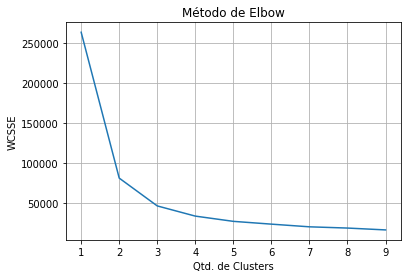

In [33]:
plt.plot(range(1, maxclusters), wcsse)
plt.title('Método de Elbow')
plt.xlabel('Qtd. de Clusters')
plt.grid()
plt.ylabel('WCSSE') # Within Cluster Sum of Squares
plt.show()

In [ ]:
data.sample(1)

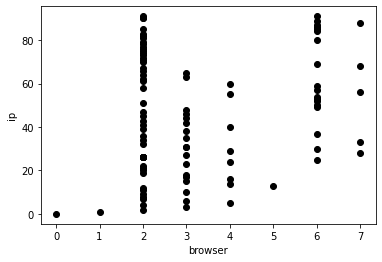

In [34]:
X = data[["ip","browser"]]
#Visualise data points
plt.scatter(X["browser"],X["ip"],c='black')
plt.xlabel('browser')
plt.ylabel('ip')
plt.show()

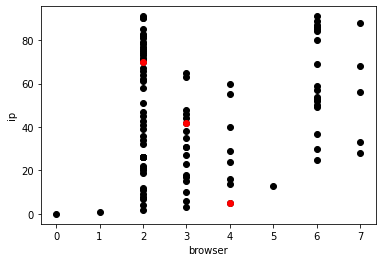

In [35]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["browser"],X["ip"],c='black')
plt.scatter(Centroids["browser"],Centroids["ip"],c='red')
plt.xlabel('browser')
plt.ylabel('ip')
plt.show()

In [36]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["browser"]-row_d["browser"])**2
            d2=(row_c["ip"]-row_d["ip"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["ip","browser"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['ip'] - Centroids['ip']).sum() + (Centroids_new['browser'] - Centroids['browser']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["ip","browser"]]

0.8987179487179553
0.0


C:\TEMP/ipykernel_13916/1053701994.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\TEMP/ipykernel_13916/1053701994.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


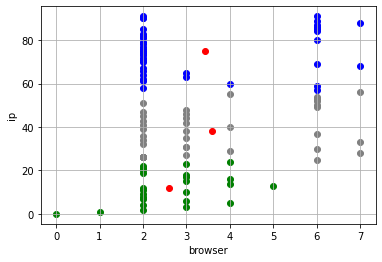

In [41]:
color=['blue','green','gray']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["browser"],data["ip"],c=color[k])
plt.scatter(Centroids["browser"],Centroids["ip"],c='red')
plt.xlabel('browser')
plt.ylabel('ip')
plt.grid()
plt.show()